<a href="https://colab.research.google.com/github/rifadukrifat-0035/Test-class/blob/main/%5BMod_7%5D_Project_04_MNIST_Digit_Classifi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
# MNIST Handwritten Digit Classifier (Deep Learning Project)

## Objective
In this project, we build and evaluate a deep learning model to classify handwritten digits (0–9) using the MNIST dataset.  
We apply data preprocessing, batch normalization, dropout regularization, and visualize training vs validation metrics.  


# **Step 0: Install and Import Necessary Libraries**

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# **Step 1: Dataset Loading**

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape :",x_train.shape)
print("Testing data shape :",x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape : (60000, 28, 28)
Testing data shape : (10000, 28, 28)


In [7]:
print(len(x_train))
print(len(x_test))

60000
10000


In [10]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
print(y_train[0])

5


# **Step 2: Preprocessing**

# Normalize

In [12]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [15]:
x_train[8]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Flatten

In [16]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [17]:
x_train.shape

(60000, 784)

# One-hot encode labels

In [18]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [19]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (60000, 784)
y_train shape: (60000, 10)


# **Step 3: Model Architecture**

In [20]:
model = Sequential([
    Dense(512, activation="relu", input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(10, activation="softmax")
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 570,506 (2.18 MB)

 Trainable params: 568,970 (2.17 MB)

 Non-trainable params: 1,536 (6.00 KB)

# **Step 4: Compile and Train**

In [21]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=128,
    verbose=2
)


Epoch 1/15
422/422 - 10s - 23ms/step - accuracy: 0.8904 - loss: 0.3541 - val_accuracy: 0.9623 - val_loss: 0.1123
Epoch 2/15
422/422 - 10s - 24ms/step - accuracy: 0.9497 - loss: 0.1665 - val_accuracy: 0.9735 - val_loss: 0.0815
Epoch 3/15
422/422 - 7s - 18ms/step - accuracy: 0.9624 - loss: 0.1231 - val_accuracy: 0.9763 - val_loss: 0.0767
Epoch 4/15
422/422 - 6s - 15ms/step - accuracy: 0.9669 - loss: 0.1059 - val_accuracy: 0.9788 - val_loss: 0.0748
Epoch 5/15
422/422 - 7s - 18ms/step - accuracy: 0.9710 - loss: 0.0925 - val_accuracy: 0.9813 - val_loss: 0.0662
Epoch 6/15
422/422 - 7s - 15ms/step - accuracy: 0.9745 - loss: 0.0809 - val_accuracy: 0.9797 - val_loss: 0.0720
Epoch 7/15
422/422 - 8s - 18ms/step - accuracy: 0.9761 - loss: 0.0776 - val_accuracy: 0.9805 - val_loss: 0.0665
Epoch 8/15
422/422 - 7s - 16ms/step - accuracy: 0.9783 - loss: 0.0678 - val_accuracy: 0.9835 - val_loss: 0.0630
Epoch 9/15
422/422 - 10s - 24ms/step - accuracy: 0.9794 - loss: 0.0651 - val_accuracy: 0.9812 - val_lo

# **Step 5: Visualization**

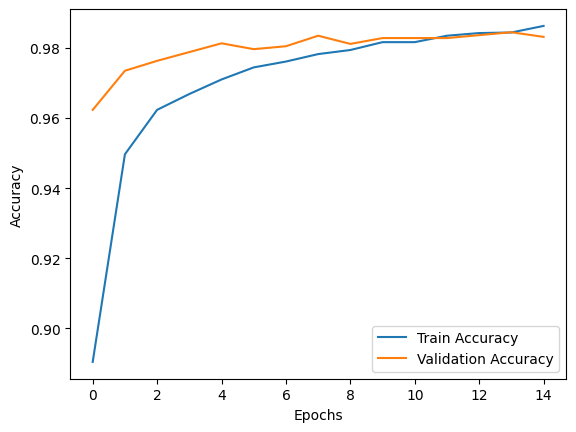

In [24]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()




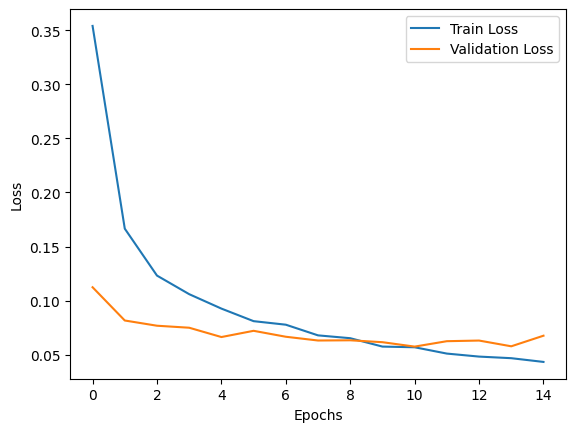

In [25]:
# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **Step 6: Evaluation**

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f}")


Final Test Accuracy: 0.9816


Test Loss: 0.0710
Test Accuracy: 0.9816
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


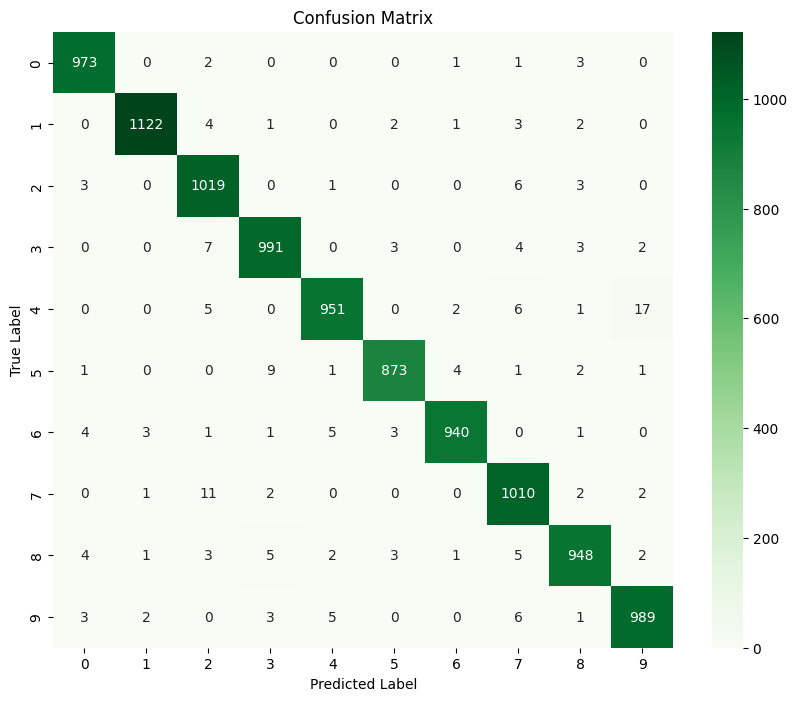


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [29]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Display confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))